In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import preprocessing


In [5]:
df=pd.read_csv('/content/drive/My Drive/PRACTICE/2022SepNewsProject/News Sentiment Analysis/Sentiment_Textlob_7500.csv')

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,category,article,analyzedTags,extractionsource,tags,text,text_lemmatized,News_sentiment
0,0,0,['agriculture'],Cargill consolidates food ingredients distribu...,[],cargill,[],cargill consolidates food ingredients distribu...,cargill consolidate food ingredient distributi...,0.112500
1,1,1,['agriculture'],Cargill Names Florian Schattenmann Vice Presid...,[],cargill,[],cargill names florian schattenmann vice presid...,cargill name florian schattenmann vice preside...,0.151115
2,2,2,['agriculture'],Honeysuckle White® expands Thanksgiving tracea...,[],cargill,[],honeysuckle white® expands thanksgiving tracea...,honeysuckle white® expand thanksgiving traceab...,0.178441
3,3,3,['agriculture'],ADM and Cargill to help farmers achieve greate...,[],cargill,[],adm cargill help farmers achieve greater profi...,adm cargill help farmer achieve great profitab...,0.164961
4,4,4,['agriculture'],Agribusinesses Seek to Modernize Global Agricu...,[],cargill,[],agribusinesses seek modernize global agricultu...,agribusiness seek modernize global agricultura...,0.108975


(array([8.0000e+00, 2.0000e+01, 2.7900e+02, 1.3481e+04, 3.7558e+04,
        1.0350e+03, 9.1000e+01, 2.8000e+01]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 <a list of 8 Patch objects>)

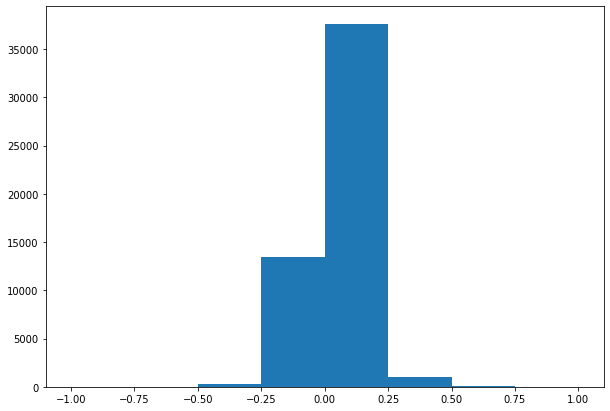

In [11]:
# Creating histogram to see distribution of News Sentiment values
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['News_sentiment'], bins = [-1,-0.75,-0.50,-0.25,0, .25, .50, .75, 1.0])

From the histogram it can be seen that the Sentiment values for the news articles are mostly neutral,with values between 0 and0.25.


Lets see which category of news has maximum  negative and positive values

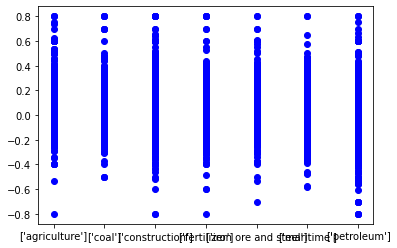

In [12]:
#Scatter plot of category and sentiment
plt.scatter(df['category'],df['News_sentiment'], c ="blue")
 
# To show the plot
plt.show()

It can be seen that Coal and Maritime categories have comparitively less number of neagative sentiment news.

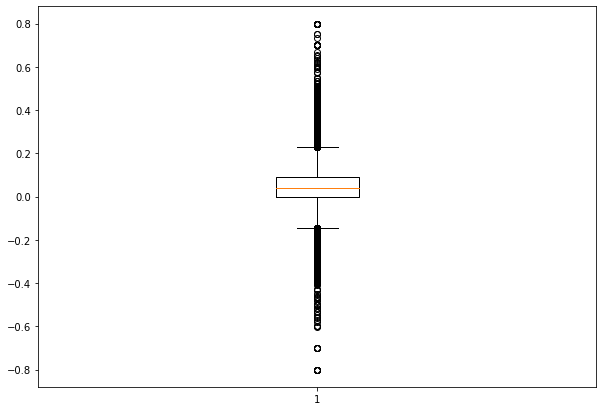

In [13]:
#Box plot on the Sentiment Column to find the Mean and Median Values
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['News_sentiment'])
 
# show plot
plt.show()

From the box plot we can see that the Mean value of sentiment is 0 .ie most of the News are neutral in sentiment value.Also Q1 and Q3 where majority of the sentiemnt values lies are also betwee -0.2 to 0.2 which is around neutral values.There are some oultiers towards negative sentiments. 

Outliers has to be removed as they can reduce the accuracy of the model.WE can remove them using the formula Q3+1.5IQR and Q1-1.5IQR


In [14]:
df['News_sentiment'].describe()

count    52500.000000
mean         0.043028
std          0.095900
min         -0.800000
25%         -0.003247
50%          0.038627
75%          0.090312
max          0.800000
Name: News_sentiment, dtype: float64

From the above we can see that Q1=-0.003 ,Q2=0.038,Q3=0.09
IQR=Q3-Q1.So applying the formula we get:

In [16]:
Q1=-0.003
Q3=0.09
IQR=Q3-Q1
Min_outliers=Q1-1.5*IQR
Max_outliers=Q3+1.5*IQR
print('Max limit outliers',Max_outliers)
print('Min limit outliers',Min_outliers)

Max limit outliers 0.2295
Min limit outliers -0.14250000000000002


In [17]:
df.loc[df['News_sentiment']>Max_outliers]

,Unnamed: 0,Unnamed: 0.1,category,article,analyzedTags,extractionsource,tags,text,text_lemmatized,News_sentiment
39,39,39,['agriculture'],Olam to award food security research grant. SI...,[],world-grain,"['wheat', 'hunger', 'Olam', 'Trends', 'educati...",olam award food security research grant singap...,olam award food security research grant singap...,0.286388
73,73,73,['agriculture'],ADM recognized for diversity in leadership. CH...,[],world-grain,"['ADM', 'Companies', 'Grain Handling/Storage C...",adm recognized diversity leadership chicago il...,adm recognize diversity leadership chicago ill...,0.267361
95,95,95,['agriculture'],"Bunge introduces pulse-based flour. ST. LOUIS,...",[],world-grain,"['claims', 'insurance, legal, maritime law', '...",bunge introduces pulsebased flour st louis mis...,bunge introduces pulsebased flour st louis mis...,0.368312
109,109,109,['agriculture'],"Tate & Lyle, Land O'Lakes SUSTAIN tackle susta...",[],world-grain,"['Sustainability', 'corn', 'Tate and Lyle', 'T...",tate lyle land olakes sustain tackle sustainab...,tate lyle land olakes sustain tackle sustainab...,0.255898
120,120,120,['agriculture'],Hybrid rice research progress highlight of HRD...,[],world-grain,"['Commodities', 'Trends', 'education and resea...",hybrid rice research progress highlight hrdc m...,hybrid rice research progress highlight hrdc m...,0.238961
...,...,...,...,...,...,...,...,...,...,...
52000,52000,52000,['petroleum'],Damaged tank spills oil into flood-swollen riv...,[],inreuters,"['oil report', 'petroleum']",damaged tank spills floodswollen river colorad...,damage tank spill floodswollen river colorado ...,0.350000
52091,52091,52091,['petroleum'],Woodside leaves door open to talks on Israel's...,"[{'entity_name': 'Mining', 'entity_type': 'ent...",inreuters,"['regulatory', 'petroleum']",woodside leaves door open talks israels leviat...,woodside leave door open talk israel leviathan...,0.282143
52122,52122,52122,['petroleum'],Parkland Fuel to buy 75 pct in fuel marketer S...,"[{'entity_name': 'Market town', 'entity_type':...",inreuters,"['regulatory', 'petroleum']",parkland fuel buy 75 pct fuel marketer sol inv...,parkland fuel buy 75 pct fuel marketer sol inv...,0.250000
52455,52455,52455,['petroleum'],C-Kore identifies subsea problem for Norske Sh...,[],worldoil,[],ckore identifies subsea problem norske shell o...,ckore identifies subsea problem norske shell o...,0.248539


In [18]:
df.loc[df['News_sentiment']<Min_outliers]

,Unnamed: 0,Unnamed: 0.1,category,article,analyzedTags,extractionsource,tags,text,text_lemmatized,News_sentiment
274,274,274,['agriculture'],ACCC won't oppose GrainCorp's proposed acquisi...,[],world-grain,"['Market Segments', 'Business', 'Companies', '...",accc wont oppose graincorps proposed acquisiti...,accc wont oppose graincorps propose acquisitio...,-0.154895
289,289,289,['agriculture'],U.S. corn crop down slightly from August. WASH...,[],world-grain,"['Commodities', 'corn', 'Market Segments', 'Bu...",corn crop slightly august washington dc — 2016...,corn crop slightly august washington dc — 2016...,-0.181282
421,421,421,['agriculture'],Industry gathers in Kansas City for wheat qual...,[],world-grain,"['wheat', 'Business', 'Companies', 'Associatio...",industry gathers kansas city wheat quality tal...,industry gather kansas city wheat quality talk...,-0.164216
484,484,484,['agriculture'],"USDA lowers corn carryover, raises soybean for...",[],world-grain,"['USDA', 'Business', 'corn', 'Companies', 'Ass...",usda lowers corn carryover raises soybean fore...,usda lower corn carryover raise soybean foreca...,-0.150000
538,538,538,['agriculture'],"Ethiopia retenders for 400,000 tonnes of milli...",[],world-grain,"['Commodities', 'wheat', 'Market Segments', 'B...",ethiopia retenders 400000 tonnes milling wheat...,ethiopia retenders 400000 tonne mill wheat bid...,-0.191667
...,...,...,...,...,...,...,...,...,...,...
52394,52394,52394,['petroleum'],US crude futures slide $1.27/bbl on volatile t...,[],icis,"['crude oil', 'petroleum']",crude futures slide 127bbl volatile trading ho...,crude future slide 127bbl volatile trade houst...,-0.226471
52398,52398,52398,['petroleum'],China butyl glycol under pressure amid weak fu...,[],icis,"['chemical', 'crude oil', 'propylene', 'petrol...",china butyl glycol pressure amid weak fundamen...,china butyl glycol pressure amid weak fundamen...,-0.148260
52399,52399,52399,['petroleum'],EVENING SNAPSHOT - Asia Markets Summary. SINGA...,[],icis,"['benzene', 'crude oil', 'petroleum', 'chemica...",evening snapshot asia markets summary singapor...,even snapshot asia market summary singapore ic...,-0.261376
52402,52402,52402,['petroleum'],India's BPCL sells late December-loading napht...,[],icis,['petroleum'],indias bpcl sells late decemberloading naphtha...,india bpcl sell late decemberloading naphtha s...,-0.166667


In [19]:
df.loc[df['News_sentiment']>0.7]

,Unnamed: 0,Unnamed: 0.1,category,article,analyzedTags,extractionsource,tags,text,text_lemmatized,News_sentiment
2927,2927,2927,['agriculture'],Salmonella finding in flour prompts recall at ...,[],world-grain,"['product recalls', 'Health and Wellness', 'Bu...",salmonella finding flour prompts recall king a...,salmonella find flour prompt recall king arthu...,0.733333
3523,3523,3523,['agriculture'],BRIEF-Agricultural Bank Of China ‍Receives CBR...,[],inreuters,"['agriculture', 'financials']",briefagricultural bank china ‍receives cbrc​ a...,briefagricultural bank china ‍receives cbrc​ a...,0.800000
3965,3965,3965,['agriculture'],BRIEF-Agrowill Group subsidiary agricultural c...,[],inreuters,"['consumer goods and retail', 'agriculture']",briefagrowill group subsidiary agricultural co...,briefagrowill group subsidiary agricultural co...,0.750000
3989,3989,3989,['agriculture'],BRIEF-Agricultural Bank of China says Zhao Hua...,[],inreuters,"['agriculture', 'financials']",briefagricultural bank china says zhao huan el...,briefagricultural bank china say zhao huan ele...,0.800000
4051,4051,4051,['agriculture'],BRIEF-Alpha MOS wins contract from South Korea...,[],inreuters,"['agriculture', 'healthcare']",briefalpha mos wins contract south korea minis...,briefalpha mo win contract south korea ministr...,0.800000
8571,8571,8571,['coal'],BUZZ-India's Usha Martin gains 18 pct on coal ...,[],inreuters,"['coal', 'company']",buzzindias usha martin gains 18 pct coal block...,buzzindias usha martin gain 18 pct coal block ...,0.800000
9051,9051,9051,['coal'],BRIEF-Business rescue practitioners suspend Op...,[],inreuters,"['coal', 'bankruptcy']",briefbusiness rescue practitioners suspend opt...,briefbusiness rescue practitioner suspend opti...,0.700000
9913,9913,9913,['coal'],BUZZ-India's Jindal Steel up; Religare says al...,"[{'entity_name': 'Phaseoleae', 'entity_type': ...",inreuters,"['coal', 'market']",buzzindias jindal steel religare says allotmen...,buzzindias jindal steel religare say allotment...,0.800000
10266,10266,10266,['coal'],MEDIA-India's JSW Steel wins 5 iron mines in K...,[],inreuters,"['coal', 'u.s.']",mediaindias jsw steel wins 5 mines karnataka c...,mediaindias jsw steel win 5 mine karnataka coa...,0.800000
12723,12723,12723,['coal'],BRIEF-Adani Enterprises comments on Queensland...,[],inreuters,"['coal', 'company']",briefadani enterprises comments queensland sc ...,briefadani enterprises comment queensland sc d...,0.800000


We are not removing the outliers as if we remove the outliers the value remaining will be neutral values to train the model.


In [21]:
X=df['text_lemmatized']
y=df['News_sentiment']

In [22]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.3)

In [67]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Train_X)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


Linear Regression

In [69]:
regr =LinearRegression()
regr.fit(Train_X_Tfidf,Train_Y)

LinearRegression()

In [71]:
test=Tfidf_vect.transform(['Good article'])
print(regr.predict(test))


[0.38239902]


In [ ]:
regr = RandomForestRegressor()
regr.fit(Train_X_Tfidf,Train_Y)
test=Tfidf_vect.transform(['Good article'])
print(regr.predict(test))